# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [78]:
states_edu_df = pd.read_csv('../data/states_edu.csv')


states_edu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [79]:
states_edu_df.isnull().sum()


PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [80]:

states_edu_df[(states_edu_df['GRADES_8_G'].isnull()) & ((states_edu_df['STATE'] == 'OHIO') | (states_edu_df['STATE'] == 'Michigan'))]


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1699,2019_OHIO,OHIO,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.0,286.0,222.0,267.0


In [81]:
missing_data = states_edu_df[states_edu_df.isnull().any(axis=1)]
missing_data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [82]:
states_edu_df['YEAR'].nunique()




33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [83]:
#Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

michigan_8_grade = states_edu_df[states_edu_df['STATE'] == 'MICHIGAN']['AVG_MATH_8_SCORE'].mean()

ohio_8_grade = states_edu_df[states_edu_df['STATE'] == 'OHIO']['AVG_MATH_8_SCORE'].mean()


print("Michigan is higher") if michigan_8_grade > ohio_8_grade else print("Ohio is higher")



Ohio is higher


Find the average for your chosen test across all states in 2019

In [84]:
avg_8_grade_2019 = states_edu_df[states_edu_df['YEAR'] == 2019]['AVG_MATH_8_SCORE'].mean()
avg_8_grade_2019

281.2641509433962

For each state, find a maximum value for your chosen test score

In [85]:
#get states dict

states_8_grade_maxiumn_dict = dict()
for state in states_edu_df['STATE'].unique():
    states_8_grade_maxiumn_dict[state] = states_edu_df[states_edu_df['STATE'] == state]['AVG_MATH_8_SCORE'].max()
states_8_grade_maxiumn_dict

{'ALABAMA': 269.0,
 'ALASKA': 283.0,
 'ARIZONA': 283.0,
 'ARKANSAS': 279.0,
 'CALIFORNIA': 277.0,
 'COLORADO': 292.0,
 'CONNECTICUT': 289.0,
 'DELAWARE': 284.0,
 'DISTRICT_OF_COLUMBIA': 269.0,
 'FLORIDA': 281.0,
 'GEORGIA': 281.0,
 'HAWAII': 281.0,
 'IDAHO': 287.0,
 'ILLINOIS': 285.0,
 'INDIANA': 288.0,
 'IOWA': 286.0,
 'KANSAS': 290.0,
 'KENTUCKY': 282.0,
 'LOUISIANA': 273.0,
 'MAINE': 289.0,
 'MARYLAND': 288.0,
 'MASSACHUSETTS': 301.0,
 'MICHIGAN': 280.0,
 'MINNESOTA': 295.0,
 'MISSISSIPPI': 274.0,
 'MISSOURI': 286.0,
 'MONTANA': 293.0,
 'NEBRASKA': 288.0,
 'NEVADA': 278.0,
 'NEW_HAMPSHIRE': 296.0,
 'NEW_JERSEY': 296.0,
 'NEW_MEXICO': 274.0,
 'NEW_YORK': 283.0,
 'NORTH_CAROLINA': 286.0,
 'NORTH_DAKOTA': 293.0,
 'OHIO': 290.0,
 'OKLAHOMA': 279.0,
 'OREGON': 285.0,
 'PENNSYLVANIA': 290.0,
 'RHODE_ISLAND': 284.0,
 'SOUTH_CAROLINA': 282.0,
 'SOUTH_DAKOTA': 291.0,
 'TENNESSEE': 280.0,
 'TEXAS': 290.0,
 'UTAH': 287.0,
 'VERMONT': 295.0,
 'VIRGINIA': 290.0,
 'WASHINGTON': 290.0,
 'WEST_VIRG

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [86]:
#using df
df = states_edu_df.dropna()

categorical_col = []
for col in df.columns:
    if df[col].dtype in [object, bool] and df[col].nunique() < 60:
        categorical_col.append(col)
categorical_col


['STATE']

In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['STATE'] = le.fit_transform(df['STATE'])
df['STATE'].head()


/tmp/ipykernel_1111997/4157827319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STATE'] = le.fit_transform(df['STATE'])


561    0
562    1
563    2
564    3
565    4
Name: STATE, dtype: int64

In [88]:
df.columns





Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [89]:
 #add features Total Revenue per Student: TOTAL_REVENUE / ENROLL
#Total Expenditure per Student: TOTAL_EXPENDITURE / ENROLL
#Total Revenue to Total Expenditure Ratio: TOTAL_REVENUE / TOTAL_EXPENDITURE
#Proportion of 8th Grade: GRADES_8_G / ENROLL
#Math Score Growth from 4th to 8th Grade: AVG_MATH_8_SCORE - AVG_MATH_4_SCORE


df['Rev_per_Student'] = df['TOTAL_REVENUE'] / df['ENROLL']
df['Exp_per_Student'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']
df['Rev_to_Exp_Ratio'] = df['TOTAL_REVENUE'] / df['TOTAL_EXPENDITURE']
df['Prop_8th_Grade'] = df['GRADES_8_G'] / df['ENROLL']
df['Math_Growth_4_to_8'] = df['AVG_MATH_8_SCORE'] - df['AVG_MATH_4_SCORE']




/tmp/ipykernel_1111997/3239574454.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rev_per_Student'] = df['TOTAL_REVENUE'] / df['ENROLL']
/tmp/ipykernel_1111997/3239574454.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Exp_per_Student'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']
/tmp/ipykernel_1111997/3239574454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Feature engineering justification:  I am label encoding the categorical feature for STATE and adding additional features related to 8th-grade math.


<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

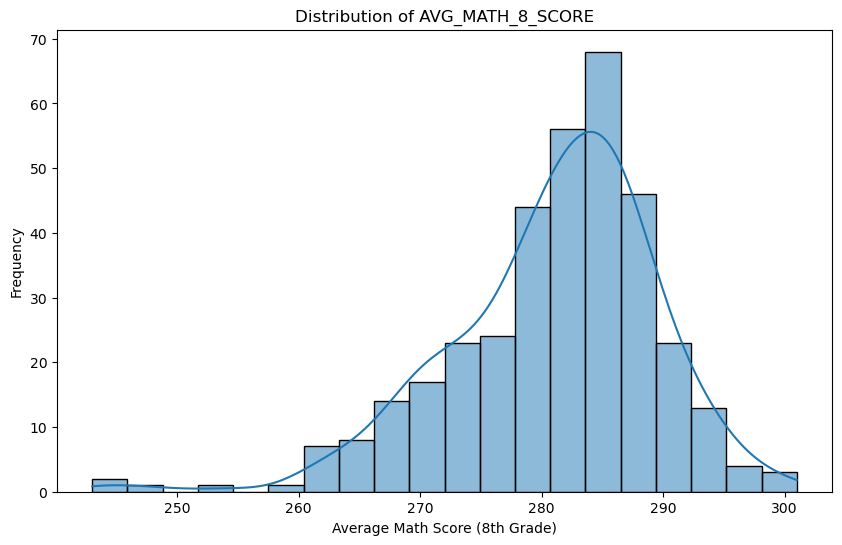

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['AVG_MATH_8_SCORE'], kde=True)
plt.title('Distribution of AVG_MATH_8_SCORE')
plt.xlabel('Average Math Score (8th Grade)')
plt.ylabel('Frequency')
plt.show()


Average Math Score (8th Grade)

**Visualization 2**

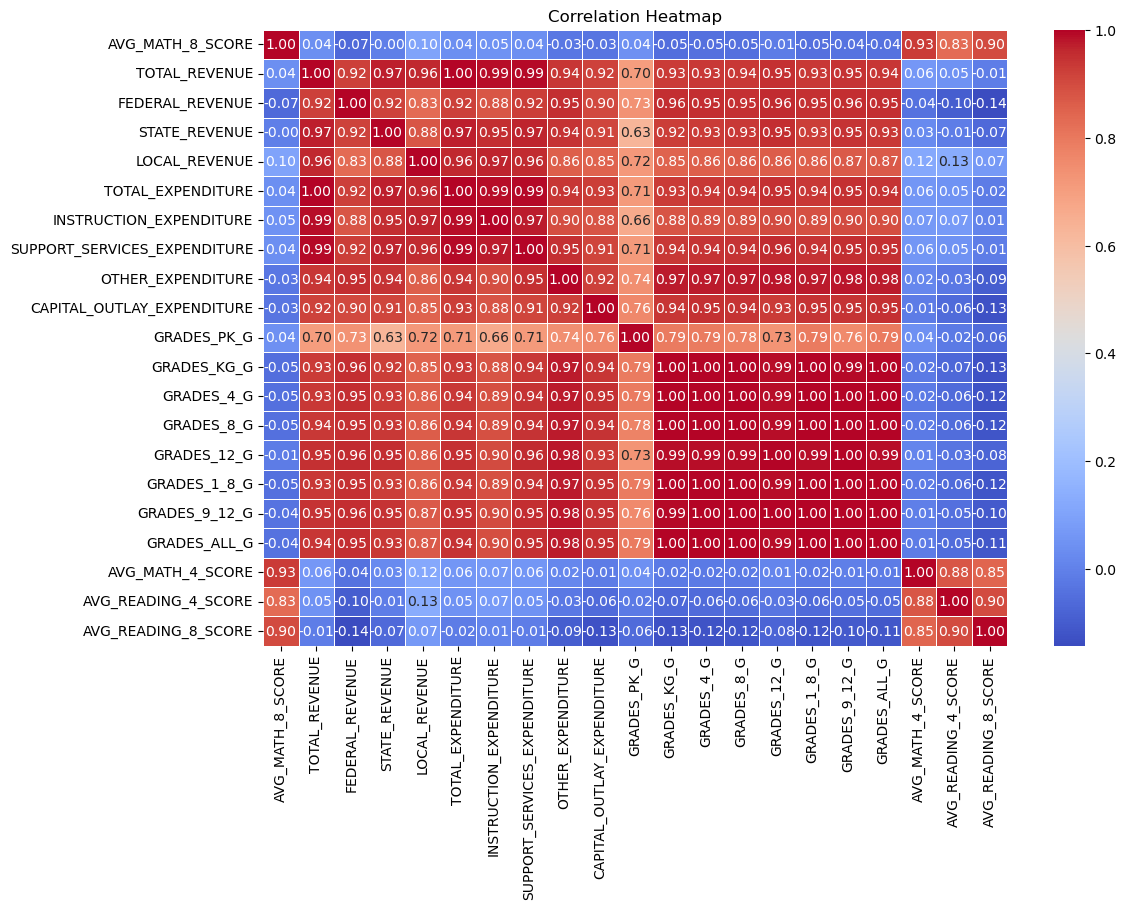

In [91]:
plt.figure(figsize=(12, 8))
corr_matrix = df[['AVG_MATH_8_SCORE', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 
                  'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 
                  'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G', 
                  'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 
                  'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Correlation Heatmap

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X = df.drop(['AVG_MATH_8_SCORE', 'PRIMARY_KEY'], axis=1)
y = df["AVG_MATH_8_SCORE"]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [95]:

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


In [96]:
from sklearn.pipeline import Pipeline

pipeline_cat = Pipeline([('cat', CatBoostRegressor())])
pipeline_lgbm = Pipeline([('lgbm', LGBMRegressor())])
pipeline_xgb = Pipeline([('xgb', XGBRegressor())])


pipelines = [pipeline_cat, pipeline_lgbm, pipeline_xgb]

pipe_dict = {0: 'CatBoost', 1: 'LGBM', 2: 'XGB'}

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

original_results = dict()

for idx, pipe in enumerate(pipelines):
    cv_score = cross_val_score(pipe, X_train, y_train, scoring='r2', cv=5).mean()
    original_results[pipe_dict[idx]] = cv_score



Learning rate set to 0.032392
0:	learn: 8.3378630	total: 2.1ms	remaining: 2.09s
1:	learn: 8.1657774	total: 3.64ms	remaining: 1.82s
2:	learn: 8.0080000	total: 4.63ms	remaining: 1.54s
3:	learn: 7.8615235	total: 5.63ms	remaining: 1.4s
4:	learn: 7.7201684	total: 6.29ms	remaining: 1.25s
5:	learn: 7.5716443	total: 6.84ms	remaining: 1.13s
6:	learn: 7.4362626	total: 7.53ms	remaining: 1.07s
7:	learn: 7.2828386	total: 8.04ms	remaining: 998ms
8:	learn: 7.1476303	total: 8.65ms	remaining: 952ms
9:	learn: 7.0551807	total: 9.27ms	remaining: 918ms
10:	learn: 6.9364839	total: 10.1ms	remaining: 905ms
11:	learn: 6.8118341	total: 10.8ms	remaining: 886ms
12:	learn: 6.6956020	total: 11.2ms	remaining: 851ms
13:	learn: 6.5744710	total: 11.8ms	remaining: 831ms
14:	learn: 6.4628492	total: 12.6ms	remaining: 830ms
15:	learn: 6.3591142	total: 13.3ms	remaining: 821ms
16:	learn: 6.2579189	total: 13.9ms	remaining: 806ms
17:	learn: 6.1601538	total: 14.4ms	remaining: 785ms
18:	learn: 6.0606093	total: 15.4ms	remaining: 

In [98]:
for model, score in original_results.items():
    print(f'{model} : {score}')

CatBoost : 0.9751634132969629
LGBM : 0.9342648854095836
XGB : 0.9678668104688513


In [101]:
#from sklearn.model_selection import GridSearchCV
cat = pipeline_cat.named_steps['cat']
cat.fit(X_train, y_train)

Learning rate set to 0.033559
0:	learn: 8.4769202	total: 2.96ms	remaining: 2.96s
1:	learn: 8.3031350	total: 38.3ms	remaining: 19.1s
2:	learn: 8.1377749	total: 39.1ms	remaining: 13s
3:	learn: 7.9904652	total: 40ms	remaining: 9.95s
4:	learn: 7.8300357	total: 40.8ms	remaining: 8.13s
5:	learn: 7.6901985	total: 42.1ms	remaining: 6.97s
6:	learn: 7.5400722	total: 42.8ms	remaining: 6.07s
7:	learn: 7.3695613	total: 43.7ms	remaining: 5.41s
8:	learn: 7.2467293	total: 44.5ms	remaining: 4.9s
9:	learn: 7.1214640	total: 45.2ms	remaining: 4.47s
10:	learn: 6.9903665	total: 46.1ms	remaining: 4.14s
11:	learn: 6.8432134	total: 46.8ms	remaining: 3.85s
12:	learn: 6.7134866	total: 47.5ms	remaining: 3.6s
13:	learn: 6.5838626	total: 48.5ms	remaining: 3.41s
14:	learn: 6.4569337	total: 50.5ms	remaining: 3.31s
15:	learn: 6.3474326	total: 52.1ms	remaining: 3.21s
16:	learn: 6.2459838	total: 53.8ms	remaining: 3.11s
17:	learn: 6.1303084	total: 55.1ms	remaining: 3.01s
18:	learn: 6.0180799	total: 60.6ms	remaining: 3.13

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

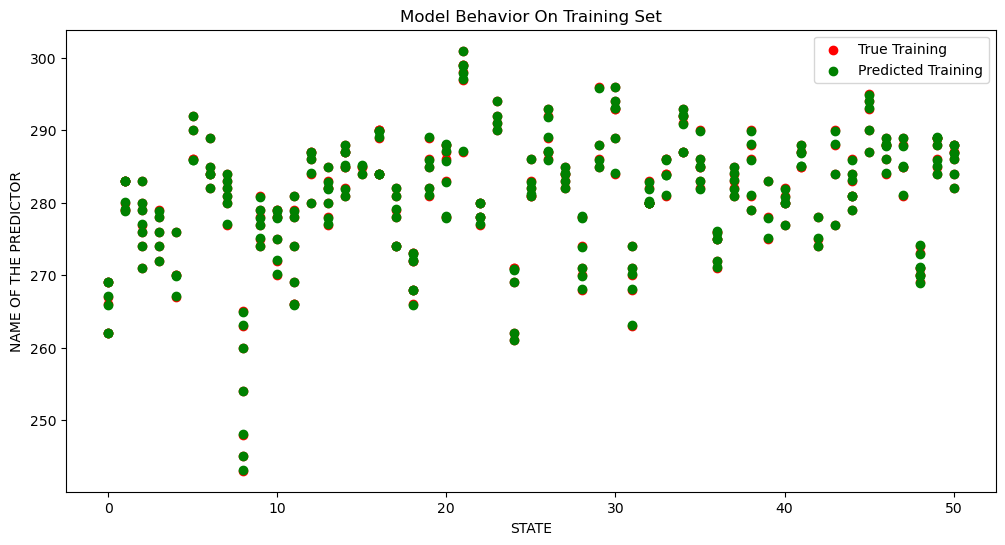

In [102]:
col_name = "STATE"
f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], cat.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

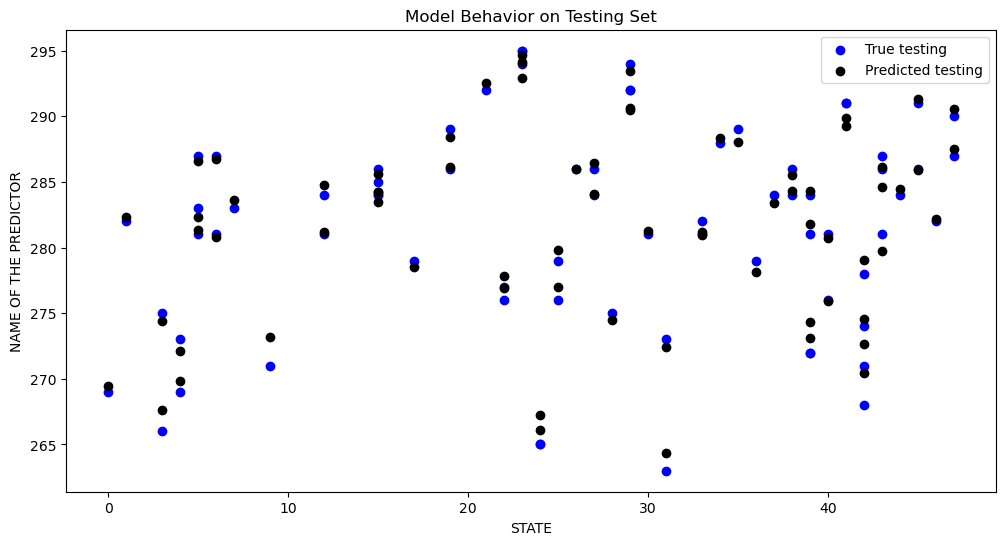

In [103]:
col_name = "STATE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], cat.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")